In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [22]:
import matplotlib.pyplot as plt
import numpy as np

*** 데이터 준비 ***

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,
    train_target,
    test_size = 0.2,
    random_state = 42
)
print(
    train_scaled.shape,
    train_target.shape,
    val_scaled.shape,
    val_target.shape
)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


*** 모델 준비 ***

In [5]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = "softmax"))
  return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [8]:
model.evaluate(val_scaled, val_target)
print(history.history.keys())

375/375 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8735
dict_keys(['loss', 'accuracy'])


In [9]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5283966064453125, 0.3946208953857422, 0.35295236110687256, 0.3236377239227295, 0.30772268772125244]
[0.8159791827201843, 0.8581874966621399, 0.8718958497047424, 0.8812083601951599, 0.886104166507721]


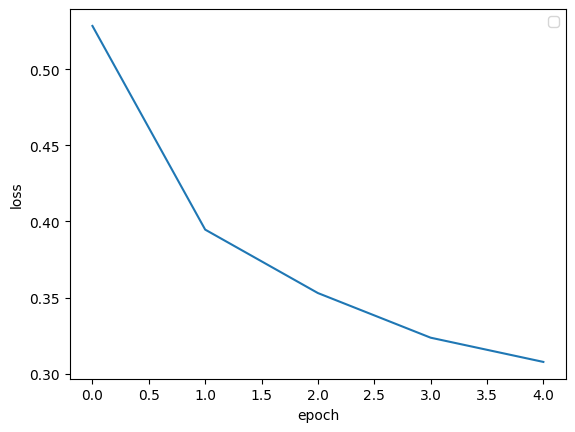

In [10]:
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

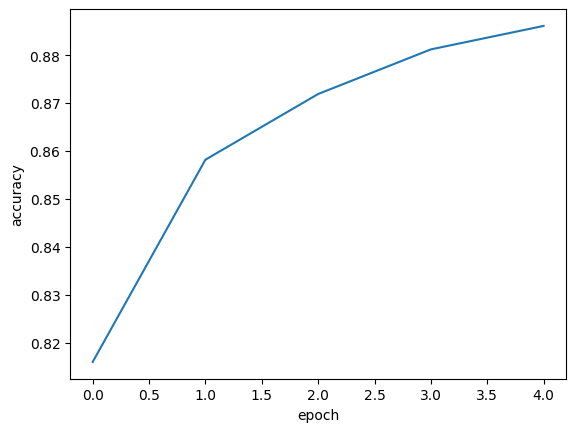

In [11]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## 더 많은 에포크

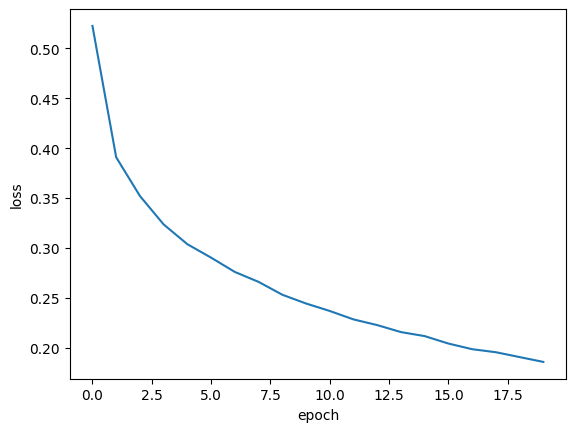

In [12]:
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
his = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(his.history['loss'])
plt.xlabel('epoch')
plt.ylabel("loss")
plt.show()

## 검증 손실
**과소/과대 적합 확인**

In [13]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics="accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data=(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5333 - accuracy: 0.8133 - val_loss: 0.4047 - val_accuracy: 0.8564
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8585 - val_loss: 0.3654 - val_accuracy: 0.8725
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3567 - accuracy: 0.8717 - val_loss: 0.3610 - val_accuracy: 0.8728
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3341 - accuracy: 0.8802 - val_loss: 0.3909 - val_accuracy: 0.8601
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.8859 - val_loss: 0.3400 - val_accuracy: 0.8777
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3044 - accuracy: 0.8909 - val_loss: 0.3556 - val_accuracy: 0.8823
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2970 - accuracy: 0.8930 - val_loss: 0.3719 - val_accuracy:

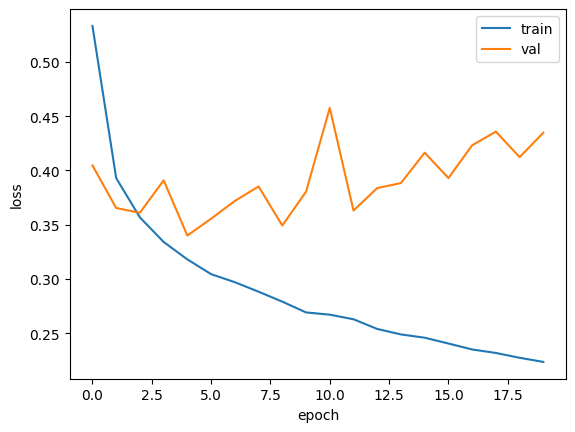

In [14]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [15]:
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics="accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data=(val_scaled, val_target))

print(his.history.keys())

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5237 - accuracy: 0.8182 - val_loss: 0.4163 - val_accuracy: 0.8494
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3901 - accuracy: 0.8601 - val_loss: 0.3799 - val_accuracy: 0.8633
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3506 - accuracy: 0.8740 - val_loss: 0.3697 - val_accuracy: 0.8676
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3214 - accuracy: 0.8825 - val_loss: 0.3639 - val_accuracy: 0.8681
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3060 - accuracy: 0.8879 - val_loss: 0.3367 - val_accuracy: 0.8781
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.8938 - val_loss: 0.3265 - val_accuracy: 0.8827
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2764 - accuracy: 0.8974 - val_loss: 0.3420 - val_accuracy:

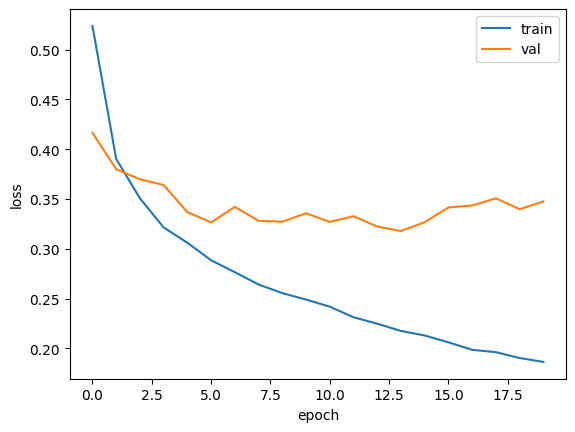

In [16]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

# 드롭 아웃
* 과대 적합 방지
* 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔 (출력 0)
* 드롭아웃 할 뉴런 개수

In [17]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
his = model.fit(train_scaled, train_target, verbose = 1, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6033 - accuracy: 0.7887 - val_loss: 0.4515 - val_accuracy: 0.8367
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4441 - accuracy: 0.8414 - val_loss: 0.3897 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4059 - accuracy: 0.8525 - val_loss: 0.3581 - val_accuracy: 0.8673
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3852 - accuracy: 0.8592 - val_loss: 0.3480 - val_accuracy: 0.8739
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3670 - accuracy: 0.8673 - val_loss: 0.3454 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3550 - accuracy: 0.8727 - val_loss: 0.3775 - val_accuracy: 0.8639
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3449 - accuracy: 0.8740 - val_loss: 0.3486 - val_accuracy:

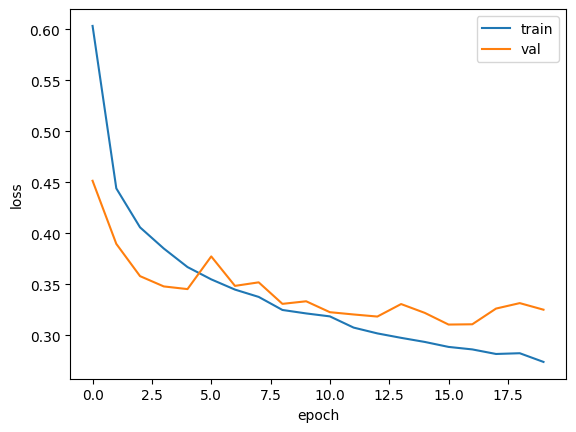

In [19]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

**모델 저장**
* save_weights : 훈련 모델의 파라미터를 저장
* save : 훈련 모델의 구조와 파라미터 저장

In [20]:
model.save_weights("model-weights.h5")
model.save("model-whole.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!ls -la *.h5

-rw-r--r-- 1 root root 333144 Apr 16 01:25 model-weights.h5
-rw-r--r-- 1 root root 981080 Apr 16 01:25 model-whole.h5


##**저장된 모델 사용**
* load_weights() 메서드를 사용하기 위해서는 save_weights() 메서드로 저장했던 모델과 정확히 동일한 구조를 가지고 있어야함

### load_weights

In [36]:
print(model.predict(val_scaled)[:5])

375/375 [==============================] - 1s 3ms/step
[[2.7646458e-11 1.1377558e-17 6.8549860e-15 1.0058737e-13 2.3593001e-13
  5.4410325e-09 8.2682429e-13 2.9160097e-13 9.9999994e-01 5.8541881e-17]
 [6.6320368e-08 5.2059742e-11 3.1784889e-08 1.7136807e-13 6.8217154e-10
  2.1268091e-08 8.3704180e-08 1.4531999e-14 9.9999970e-01 5.8515644e-13]
 [5.7630428e-12 1.3352658e-15 3.0408934e-15 8.2725668e-15 7.4756087e-15
  1.6469754e-04 3.2712597e-13 9.9983525e-01 1.1428167e-12 1.3946241e-07]
 [1.2737799e-03 1.3213806e-05 8.4710039e-02 1.2786238e-04 8.4775281e-01
  7.5496770e-10 6.6015922e-02 2.4851060e-11 1.0643845e-04 1.3978309e-11]
 [2.4424148e-13 1.7318446e-14 1.0630816e-16 1.3510690e-14 1.8439179e-15
  7.5321631e-11 2.0318410e-15 1.7569973e-11 9.9999994e-01 3.1137714e-13]]


In [39]:
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(val_labels[:5])
print(val_target[:5])

print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
[8 8 7 4 8]
[8 8 7 4 8]
0.8909166666666667


In [40]:
val_labels == val_target

array([ True,  True,  True, ...,  True,  True, False])

### load_model

In [43]:
model = keras.models.load_model('./model-whole.h5')
model.summary()

model.evaluate(val_scaled, val_target)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
375/375 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8909


[0.32524579763412476, 0.890916645526886]

# 콜백
* 훈련과정 중간에 타 작업 수행 처리


**최상 검증 점수 모델 저장 콜백**

In [46]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")

checkpoint_cb = keras.callbacks.ModelCheckpoint('junsgi.h5', save_best_only = 1 == 1 or 2 == 2)
model.fit(train_scaled, train_target, epochs = 20, verbose = 2, callbacks = [checkpoint_cb], validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 - 8s - loss: 0.5895 - accuracy: 0.7926 - val_loss: 0.4322 - val_accuracy: 0.8439 - 8s/epoch - 5ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 - 5s - loss: 0.4387 - accuracy: 0.8418 - val_loss: 0.4108 - val_accuracy: 0.8472 - 5s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 4s - loss: 0.4050 - accuracy: 0.8531 - val_loss: 0.3679 - val_accuracy: 0.8622 - 4s/epoch - 2ms/step
Epoch 4/20
1500/1500 - 5s - loss: 0.3832 - accuracy: 0.8608 - val_loss: 0.3599 - val_accuracy: 0.8692 - 5s/epoch - 3ms/step
Epoch 5/20
1500/1500 - 6s - loss: 0.3676 - accuracy: 0.8650 - val_loss: 0.3490 - val_accuracy: 0.8708 - 6s/epoch - 4ms/step
Epoch 6/20
1500/1500 - 5s - loss: 0.3527 - accuracy: 0.8714 - val_loss: 0.3465 - val_accuracy: 0.8742 - 5s/epoch - 3ms/step
Epoch 7/20
1500/1500 - 6s - loss: 0.3439 - accuracy: 0.8717 - val_loss: 0.3364 - val_accuracy: 0.8755 - 6s/epoch - 4ms/step
Epoch 8/20
1500/1500 - 5s - loss: 0.3351 - accuracy: 0.8748 - val_loss: 0.3319 - val_accuracy: 0.8788 - 5s/epoch - 3ms/step
Epoch 9/20
1500/1500 - 7s - loss: 0.3272 - accuracy: 0.8789 - val_loss: 0.3389 - val_accuracy: 0.8791 - 7s/epoch - 4ms/step
Epoch 10/20
1500/15

**조기종료**
* patience : 검증 점수(손실율) 미상향 시 몇 번 더 수행할 지 정하는 에포크 수
* restore_best_weights : 가장 낮은 검증 손실 모델 파라미터 상태로 되돌림

In [52]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
his = model.fit(
    train_scaled, train_target,
    epochs = 20,
    verbose = 2,
    callbacks = [checkpoint_cb, early_stopping_cb],
    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 - 5s - loss: 0.2584 - accuracy: 0.9029 - val_loss: 0.3258 - val_accuracy: 0.8871 - 5s/epoch - 3ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.2580 - accuracy: 0.9017 - val_loss: 0.3261 - val_accuracy: 0.8906 - 4s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 4s - loss: 0.2545 - accuracy: 0.9026 - val_loss: 0.3264 - val_accuracy: 0.8912 - 4s/epoch - 3ms/step
Epoch 4/20
1500/1500 - 5s - loss: 0.2550 - accuracy: 0.9040 - val_loss: 0.3228 - val_accuracy: 0.8901 - 5s/epoch - 3ms/step
Epoch 5/20
1500/1500 - 4s - loss: 0.2529 - accuracy: 0.9025 - val_loss: 0.3255 - val_accuracy: 0.8912 - 4s/epoch - 2ms/step
Epoch 6/20
1500/1500 - 4s - loss: 0.2523 - accuracy: 0.9044 - val_loss: 0.3224 - val_accuracy: 0.8900 - 4s/epoch - 3ms/step
Epoch 7/20
1500/1500 - 5s - loss: 0.2472 - accuracy: 0.9052 - val_loss: 0.3315 - val_accuracy: 0.8890 - 5s/epoch - 3ms/step
Epoch 8/20
1500/1500 - 4s - loss: 0.2464 - accuracy: 0.9066 - val_loss: 0.3341 - val_accuracy: 0.8893 - 4s/epoch - 2ms/step
Epoch 9/

In [51]:
print(early_stopping_cb.stopped_epoch)

4


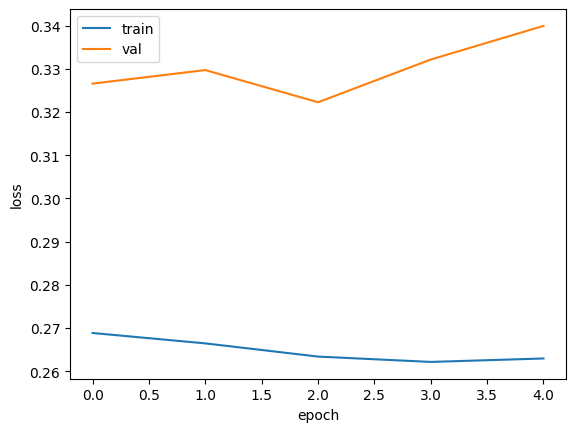

In [50]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()